In [1]:
import os
import argparse
import matplotlib
import numpy as np
from plantcv import plantcv as pcv
from matplotlib import pyplot as plt

In [2]:
class options:
    def __init__(self):
        self.image = "./img/4.jpg"
        self.debug = "plot"
        self.writeimg = False
        self.result = "data_output"
        self.outdir = "img_output"


args = options()
pcv.params.debug_outdir = args.outdir
pcv.params.debug = args.debug

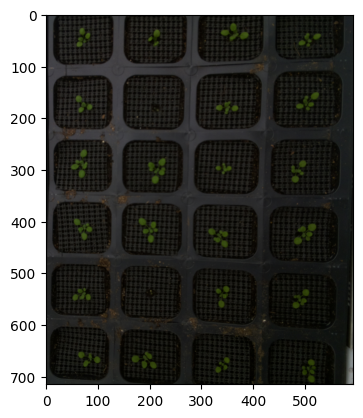

In [3]:
img, path, filename = pcv.readimage(filename=args.image)

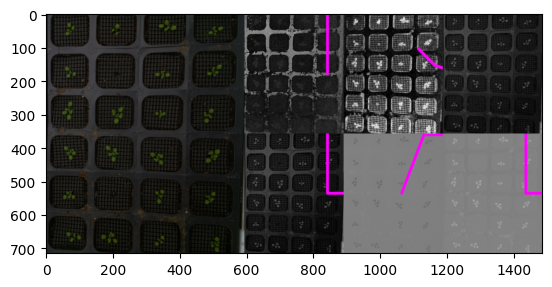

In [4]:
# Update params related to plotting so we can see better
pcv.params.text_size = 50
pcv.params.text_thickness = 15

colorspace_img = pcv.visualize.colorspaces(rgb_img=img)

Deprecation Warning:
    plantcv.rotate has moved to plantcv.transform.rotate. 
    plantcv.rotate will be removed in a future version


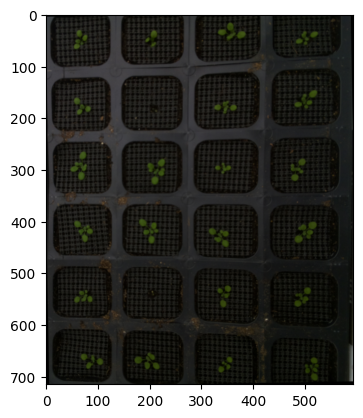

In [5]:
rot_img = pcv.rotate(img=img, rotation_deg=1, crop=True)

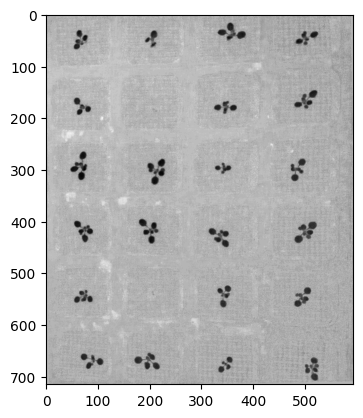

In [6]:

#### Create a mask and begin to clean it ####
# Change color space for plant extraction
a = pcv.rgb2gray_lab(rgb_img=rot_img, channel="a")

In [7]:
#hist = pcv.visualize.histogram(gray_img=a)

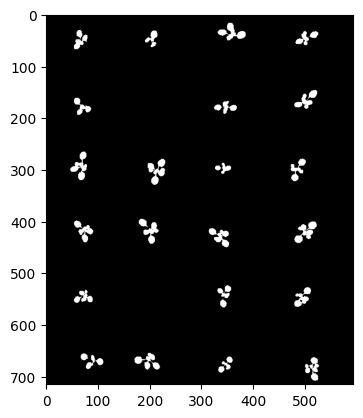

In [8]:
# Threshold
a_thresh = pcv.threshold.binary(gray_img=a, threshold=120, max_value=255, object_type='dark')

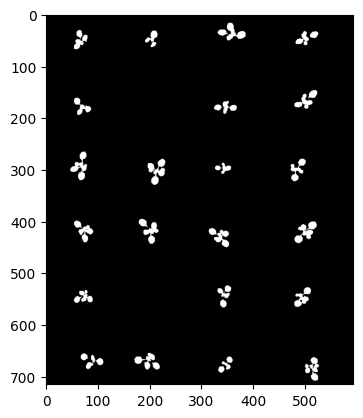

In [9]:
# Fill in small objects
a_fill_image = pcv.fill(bin_img=a_thresh, size=50)

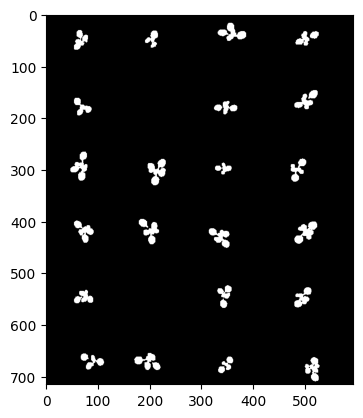

In [10]:
# Dilate
a_dilated = pcv.dilate(gray_img=a_fill_image, ksize=2, i=1)

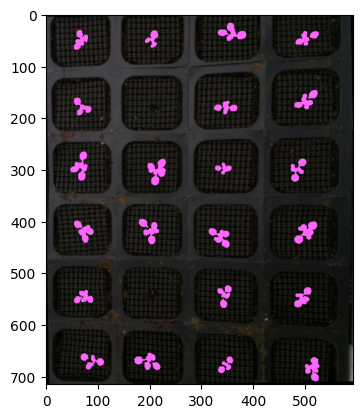

In [11]:
obj, obj_hierarchy = pcv.find_objects(img=rot_img, mask=a_dilated)

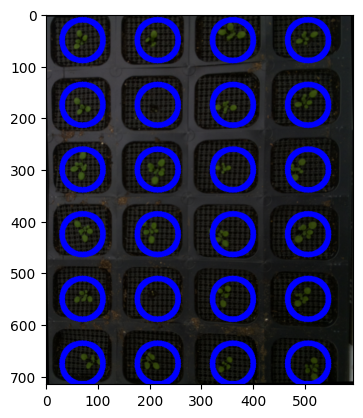

In [12]:
# Create a grid of ROIs
pcv.params.line_thickness = 10
rois1, roi_hierarchy1 = pcv.roi.multi(img=rot_img, coord=(70, 50), radius=40, spacing=(145, 125), nrows=6, ncols=4)
#rois1, roi_hierarchy1 = pcv.roi.multi(img=rot_img, coord=(370, 50), radius=40,  spacing=(150, 125), nrows=6, ncols=4)
#rois1, roi_hierarchy1 = pcv.roi.multi(img=rot_img, coord=(200, 100), radius=100,  spacing=(50, 50), nrows=1, ncols=1)

In [13]:
plant_id = range(0, len(rois1))

There were 0 objects not annotated.


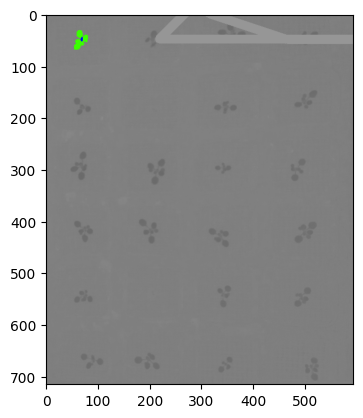

   object area  cumulative probability
0         21.5                     0.5
1        515.0                     1.0
Area`s object 536.5
There were 0 objects not annotated.


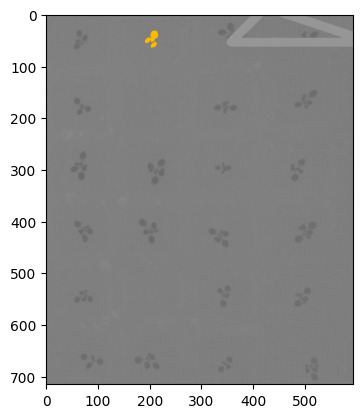

   object area  cumulative probability
0          2.0                     0.5
1        375.0                     1.0
Area`s object 913.5
There were 0 objects not annotated.


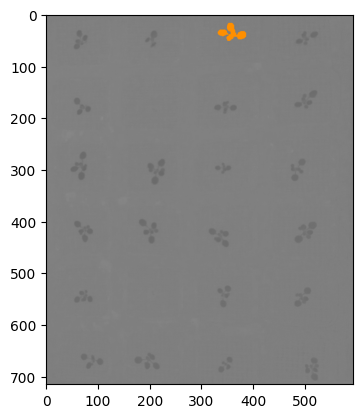

   object area  cumulative probability
0        776.5                     1.0
Area`s object 1690.0
There were 0 objects not annotated.


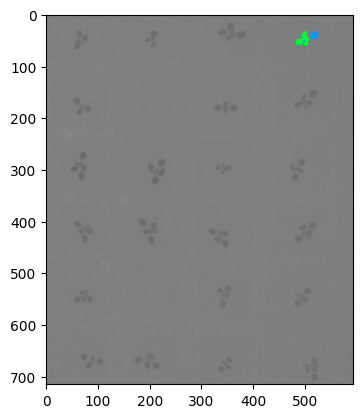

   object area  cumulative probability
0          8.5                0.333333
1        166.5                0.666667
2        377.0                1.000000
Area`s object 2242.0
There were 0 objects not annotated.


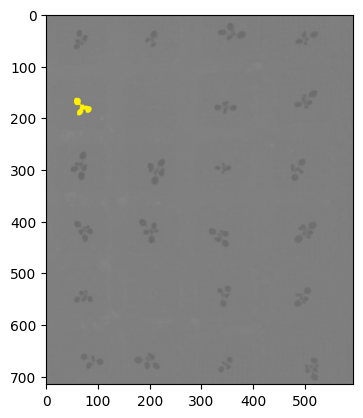

   object area  cumulative probability
0        451.5                     1.0
Area`s object 2693.5
There were 0 objects not annotated.


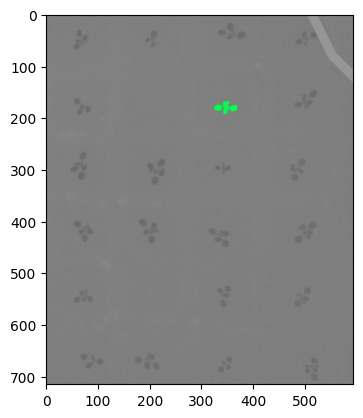

   object area  cumulative probability
0        133.0                     0.5
1        352.5                     1.0
Area`s object 3179.0
There were 0 objects not annotated.


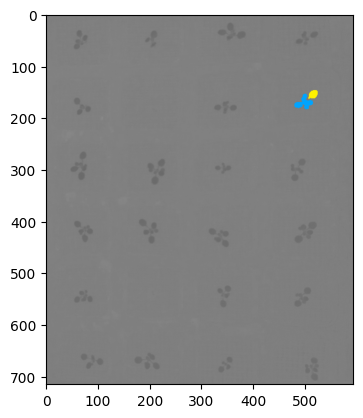

   object area  cumulative probability
0        204.5                     0.5
1        461.5                     1.0
Area`s object 3845.0
There were 0 objects not annotated.


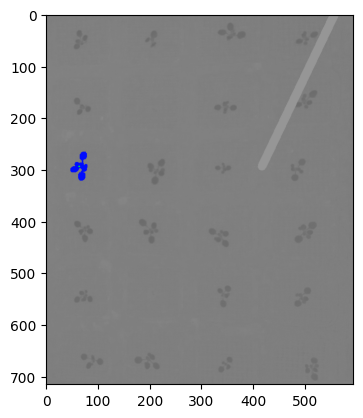

   object area  cumulative probability
0          4.0                     0.5
1        770.5                     1.0
Area`s object 4619.5
There were 0 objects not annotated.


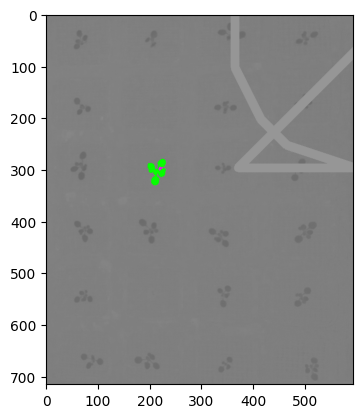

   object area  cumulative probability
0         29.0                     0.5
1        885.5                     1.0
Area`s object 5534.0
There were 0 objects not annotated.


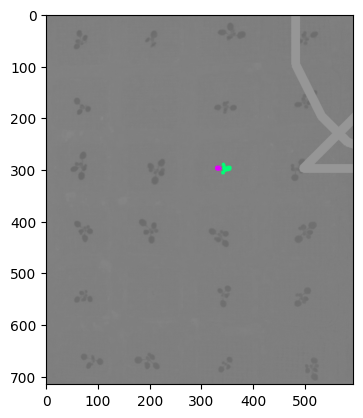

   object area  cumulative probability
0         87.0                     0.5
1        223.5                     1.0
Area`s object 5844.5
There were 0 objects not annotated.


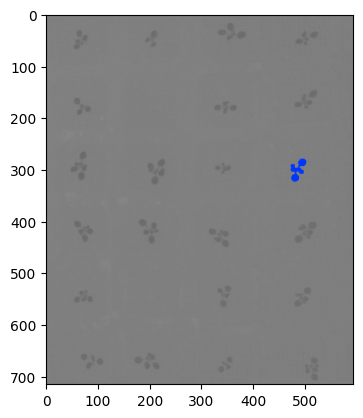

   object area  cumulative probability
0        569.0                     1.0
Area`s object 6413.5
There were 0 objects not annotated.


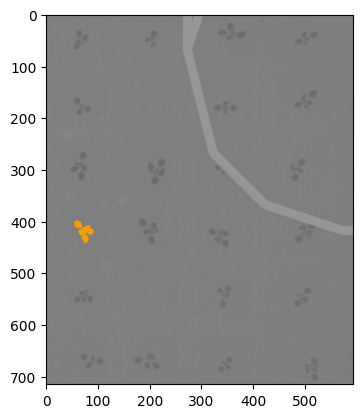

   object area  cumulative probability
0         11.5                     0.5
1        660.0                     1.0
Area`s object 7085.0
There were 0 objects not annotated.


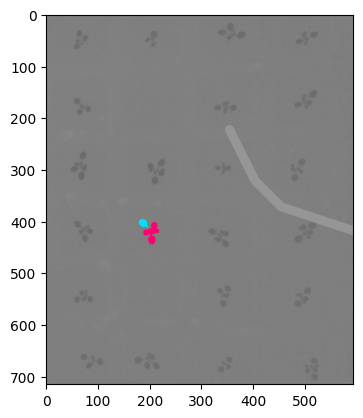

   object area  cumulative probability
0        189.5                     0.5
1        564.5                     1.0
Area`s object 7839.0
There were 0 objects not annotated.


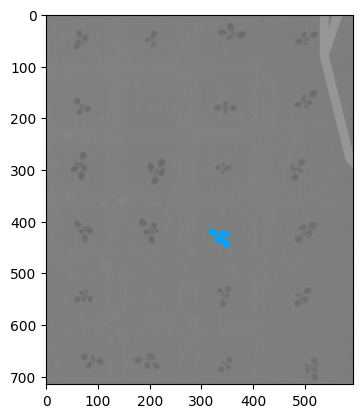

   object area  cumulative probability
0        697.5                     1.0
Area`s object 8536.5
There were 0 objects not annotated.


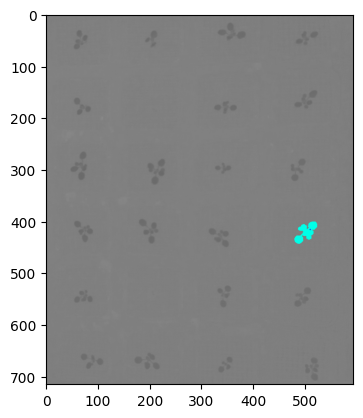

   object area  cumulative probability
0          2.0                     0.5
1        843.5                     1.0
Area`s object 9382.0
There were 0 objects not annotated.


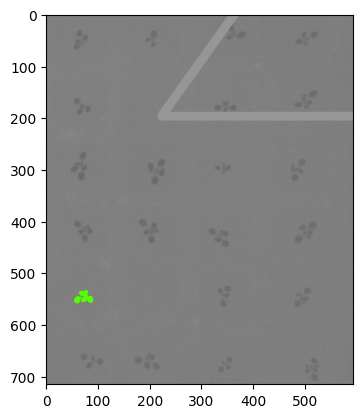

   object area  cumulative probability
0        490.5                     1.0
Area`s object 9872.5
There were 0 objects not annotated.


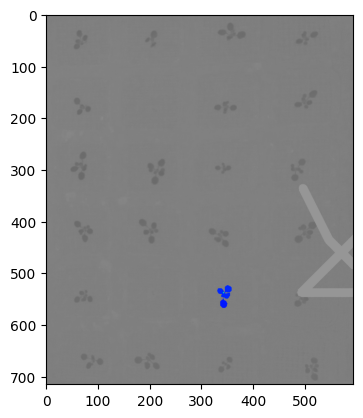

   object area  cumulative probability
0          2.0                0.333333
1        155.5                0.666667
2        360.0                1.000000
Area`s object 10390.0
There were 0 objects not annotated.


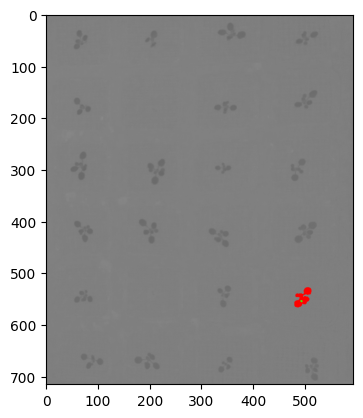

   object area  cumulative probability
0          8.5                     0.5
1        604.0                     1.0
Area`s object 11002.5
There were 0 objects not annotated.


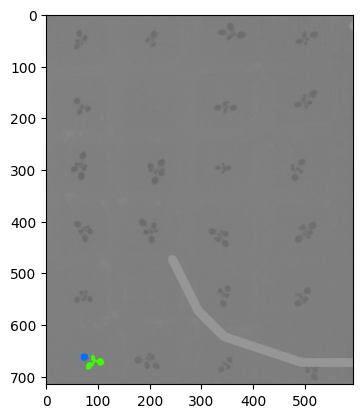

   object area  cumulative probability
0        144.5                     0.5
1        372.5                     1.0
Area`s object 11519.5
There were 0 objects not annotated.


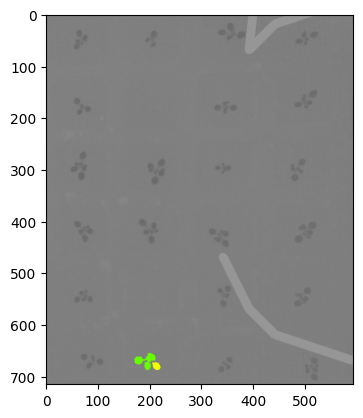

   object area  cumulative probability
0        157.0                     0.5
1        545.0                     1.0
Area`s object 12221.5
There were 0 objects not annotated.


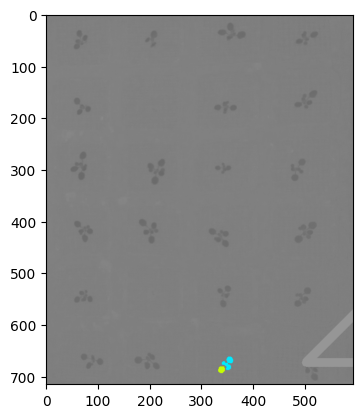

   object area  cumulative probability
0        121.5                     0.5
1        251.5                     1.0
Area`s object 12594.5
There were 0 objects not annotated.


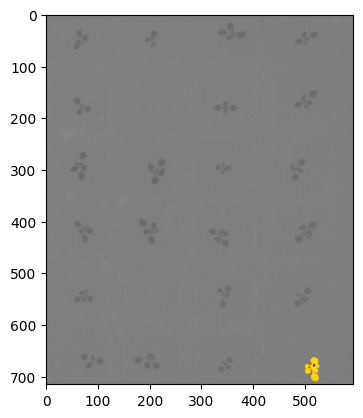

   object area  cumulative probability
0          7.0                0.333333
1         10.0                0.666667
2        683.5                1.000000
Area`s object 13295.0


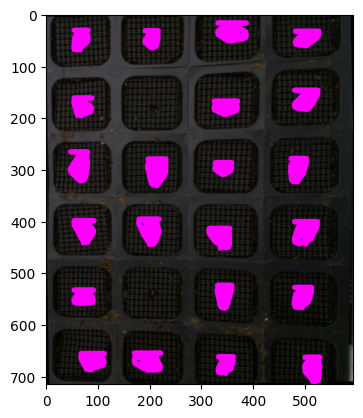

In [21]:
img_copy = np.copy(rot_img)
pcv.params.debug = None

for i in range(0, len(rois1)):
    roi = rois1[i]
    hierarchy = roi_hierarchy1[i]
    id_label = plant_id[i]
    # Find objects
    filtered_contours, filtered_hierarchy, filtered_mask, filtered_area = pcv.roi_objects(
        img=rot_img, roi_type="partial", roi_contour=roi, roi_hierarchy=hierarchy, object_contour=obj,
        obj_hierarchy=obj_hierarchy)
    area_object = 0
    if filtered_area > 0:
        # Combine objects together in each plant
        plant_contour, plant_mask = pcv.object_composition(img=rot_img, contours=filtered_contours,
                                                           hierarchy=filtered_hierarchy)

        #pseudocolor_img  = pcv.visualize.pseudocolor(gray_img=a, obj=plant_contour, mask=plant_mask,  background="white", cmap='viridis',min_value=30, max_value=200)
        #plt.figure(pseudocolor_img)
        #plt.show()

        #analysis_image = pcv.watershed_segmentation(rgb_img=img_copy, mask=plant_mask, distance=10, label=id_label)
        #pcv.plot_image(analysis_image)

        plotting_img = pcv.visualize.obj_sizes(img=a, mask=plant_mask)
        pcv.plot_image(plotting_img)

        fig_ecdf = pcv.visualize.obj_size_ecdf(mask=plant_mask, title="Cumulative distribution for object sizes")
        print(fig_ecdf.data)
        for j in fig_ecdf.data.values:
            area_object += j[0]
        print("Area`s object", area_object)  # 10^area_object
        #pcv.plot_image(fig_ecdf)
        # Analyze the shape of each plant
        img_copy = pcv.analyze_object(img=img_copy, obj=plant_contour, mask=plant_mask, label=id_label)

pcv.plot_image(img_copy)
pcv.print_image(img_copy, os.path.join(args.outdir, filename + "_shapes.jpg"))